<hr/>

# Minimizing Risks for Loan Investments - (Keras - Artificial Neural Network)
### [by Tomas Mantero](https://www.kaggle.com/tomasmantero)
<hr/>

### Table of Contents
* **1. [Introduction](#ch1)**
* **2. [Dataset](#ch2)**
* **3. [Exploratory Data Analysis](#ch3)**
* **4. [Data PreProcessing](#ch4)**
* **5. [Categorical Variables and Dummy Variables](#ch5)**
* **6. [Scaling and Train Test Split](#ch6)**
* **7. [Creating a Model](#ch7)**
* **8. [Training the Model](#ch8)**
* **9. [Evaluation on Test Data](#ch9)**
* **10. [Predicting on a New Customer](#ch10)**
* **11. [References](#ch11)**

<a id="ch1"></a>
# 1. Introduction 
---

One of the objectives of this notebook is to **show step-by-step how to visualize the dataset and assess whether or not a new customer is likely to pay back the loan.**

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we can build a model that can predict if a borrower will pay back their loan. This way in the future when we get a new potential customer, **we can assess if they are likely to pay back the loan.**

The following questions will be answered throughout the Kernel:
* ***Which features are available in the dataset?***
* ***What is the distribution of numerical feature values across the samples?***
* ***What is the length of the dataframe?***
* ***What is the total count of missing values per column?***
* ***How many unique employment job titles are there?***
* ***Do you wonder how lending companies choose whether to give you money or not?***
* ***How does a lending company decide how much money to give you?***
* ***Would you offer this person a loan?***
* ***Did this person actually end up paying back their loan?***

If you have a question or feedback, do not hesitate to write and if you like this kernel,<b><font color='green'> please upvote! </font></b>

<img src="https://images.pexels.com/photos/259165/pexels-photo-259165.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260" title="source: www.pexels.com" width="500" height="500"/>
<br>

<a id="ch2"></a>
# 2. Dataset
---

* We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---

## Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# evaluation on test data
from sklearn.metrics import classification_report,confusion_matrix

Before starting, let us make a function to get feature information on the data as a .csv file for easy lookup throughout the notebook. 

In [2]:
data_info = pd.read_csv('../input/subset-lending-club-loan/lending_club_info.csv',index_col='LoanStatNew')

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

# example
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data

In [3]:
df = pd.read_csv('../input/subset-lending-club-loan/lending_club_loan_two.csv')

**Which features are available in the dataset?**

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Preview the data**

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


**What is the distribution of numerical feature values across the samples?**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


<a id="ch3"></a>
# 3. Exploratory Data Analysis
---

## Analyze by visualizing data
Get an understanding for which variables are important, view summary statistics, and visualize the data.

## Pearson correlation matrix
We use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.

The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables. For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

The sign of the coefficient indicates the direction of the relationship. If both variables tend to increase or decrease together, the coefficient is positive, and the line that represents the correlation slopes upward. If one variable tends to increase as the other decreases, the coefficient is negative, and the line that represents the correlation slopes downward.

* We can see a strong correlation between loan_amnt and installment. (The monthly payment owed by the borrower if the loan originates)

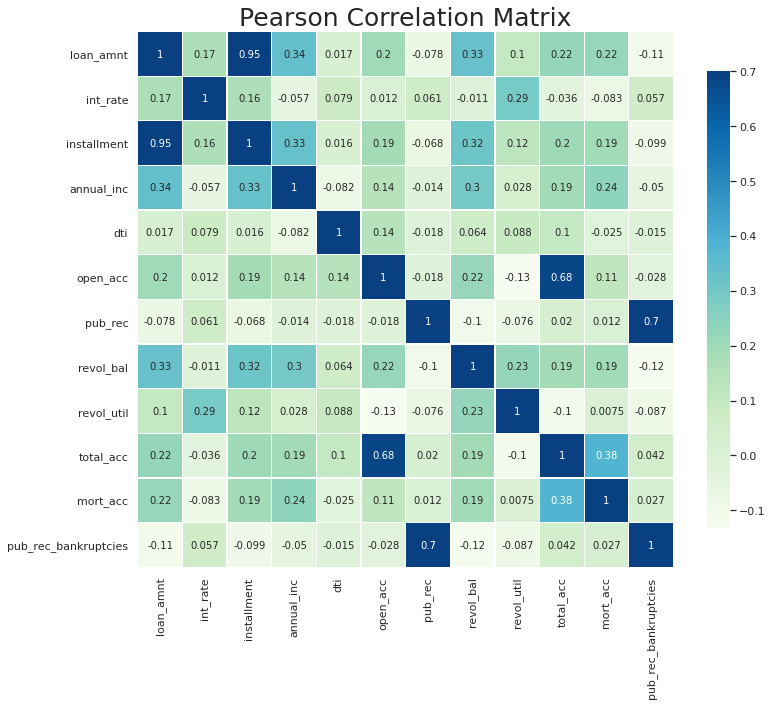

In [7]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(12,12))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":10}, cbar_kws={"shrink": .7})

## Loan status and loan amount distribution
* This is an imbalance problem, because we have a lot more entries of people that fully paid their loans then people that did not pay back.
* We can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we will have to evaluate our model based off of.
* In the loan amount distribution we can see spikes in even ten thousend dollar, so this is indicating that there are certain amounts that are basically standard loans.

Text(0.5, 1.0, 'Loan Amount Distribution')

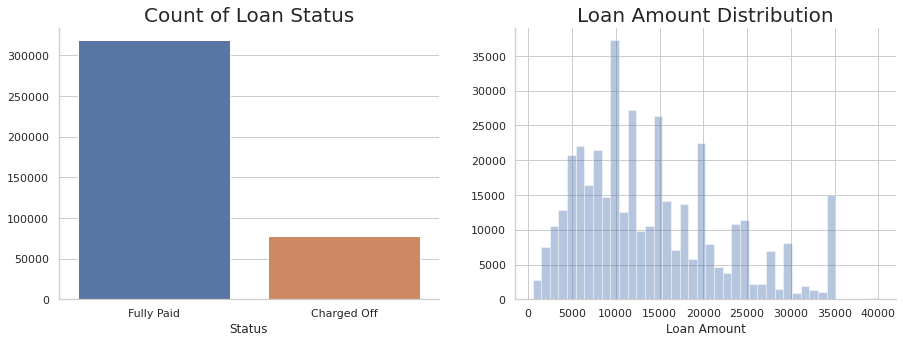

In [8]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=df, ax=axes[0])
sns.distplot(df['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='')
axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='')
axes[1].set_title('Loan Amount Distribution', size=20)

## Relationship between loan_amnt, loan_status and installment

Text(0.5, 1.0, 'Boxplot between Loan Amount and Loan Status')

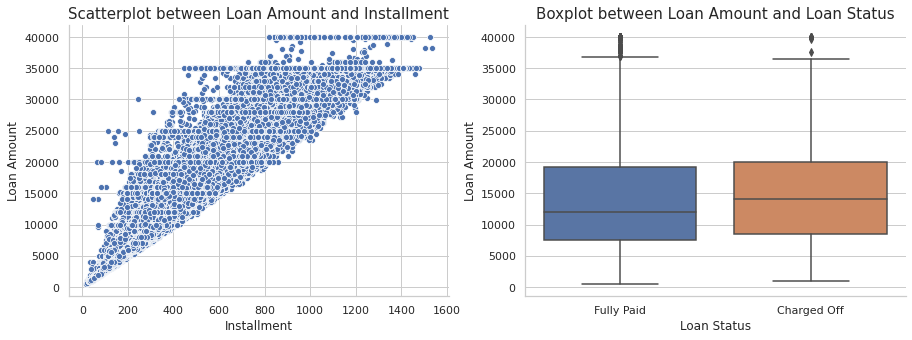

In [9]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='installment', y='loan_amnt', data=df, ax=axes[0])
sns.boxplot(x='loan_status', y='loan_amnt', data=df, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Installment', ylabel='Loan Amount')
axes[0].set_title('Scatterplot between Loan Amount and Installment', size=15)
axes[1].set(xlabel='Loan Status', ylabel='Loan Amount')
axes[1].set_title('Boxplot between Loan Amount and Loan Status', size=15)

In case that the boxplot is a little hard to read you can always compare the averages here: 
* So you can see the charged off average price is a little higher than the fully paid loan.

In [10]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


## Countplot per grade and subgrade
* Essentially this is showing the percentage of charged off loans.
* Looks like it is increasing as the letter grade gets higher.
* Better grades are bluer and the worse grades are redder.

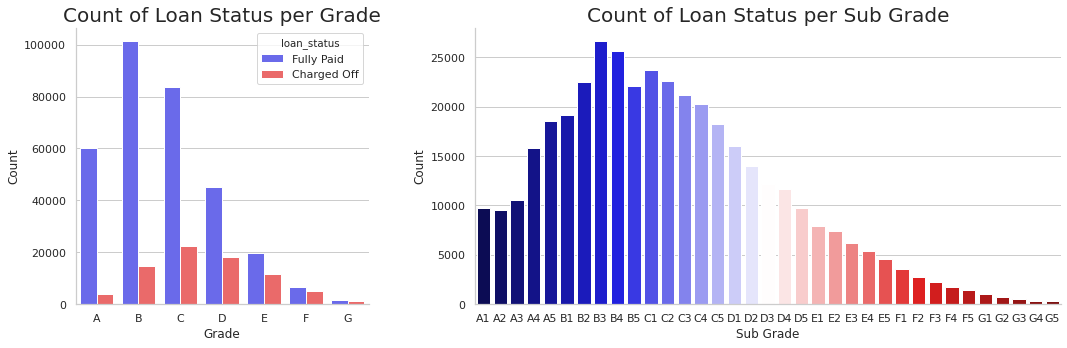

In [11]:
f, axes = plt.subplots(1, 2, figsize=(15,5), gridspec_kw={'width_ratios': [1, 2]})
sns.countplot(x='grade', hue='loan_status', data=df, order=sorted(df['grade'].unique()), palette='seismic', ax=axes[0])
sns.countplot(x='sub_grade', data=df, palette='seismic', order=sorted(df['sub_grade'].unique()), ax=axes[1])
sns.despine()
axes[0].set(xlabel='Grade', ylabel='Count')
axes[0].set_title('Count of Loan Status per Grade', size=20)
axes[1].set(xlabel='Sub Grade', ylabel='Count')
axes[1].set_title('Count of Loan Status per Sub Grade', size=20)
plt.tight_layout()

Now we are going to create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [12]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df[['loan_repaid','loan_status']].head()

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off


* The interest rate has essentially the highest negative correlation with whether or not someone is going to repay their loan.
* If you have a extremely high interest rate you are going to find it harder to pay off that loan.

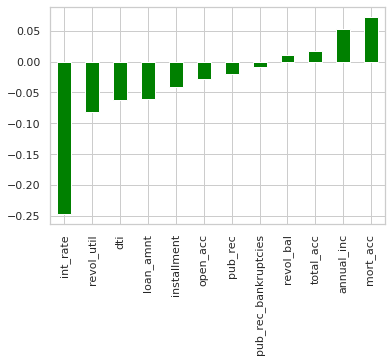

In [13]:
df.corr()['loan_repaid'].sort_values(ascending=True).drop('loan_repaid').plot.bar(color='green')

<a id="ch4"></a>
# 4. Data preprocessing
---
Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

## Missing data
***What is the length of the dataframe?***

In [14]:
print(len(df))

396030


***What is the total count of missing values per column?***

We have missing values in emp_title, emp_length, title, revol_util, mort_acc and pub_rec_bankruptcies. 

In [15]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [16]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')
print('\n')
feat_info('title')
print('\n')
feat_info('revol_util')
print('\n')
feat_info('mort_acc')
print('\n')
feat_info('pub_rec_bankruptcies')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


The loan title provided by the borrower


Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Number of mortgage accounts.


Number of public record bankruptcies


## Percentage of missing values per column
* In the plot we can see how much data is missing as a percentage of the total data.
* Notice that there is missing almost 10% of mortgage accounts, so we can not drop all those rows. 
* On the other hand, we could drop missing values in revol_util or pub_rec_bankruptcies.

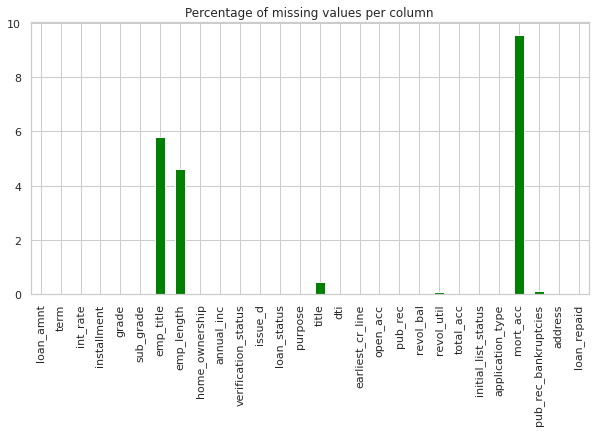

In [17]:
plt.figure(figsize=(10,5))
((df.isnull().sum())/len(df)*100).plot.bar(title='Percentage of missing values per column', color='green')

Let's examine emp_title and emp_length to see whether it will be okay to drop them.

***How many unique employment job titles are there?***

Realistically there are too many unique job titles to try to convert this to a dummy variable feature.

In [18]:
print(df['emp_title'].nunique())
df['emp_title'].value_counts()

173105


Teacher                                4389
Manager                                4250
Registered Nurse                       1856
RN                                     1846
Supervisor                             1830
                                       ... 
Meta Interfaces, LLC                      1
lululemon athletica                       1
Ten Oaks                                  1
property accountability specialist        1
DIRECTOR OF PROGRAMS                      1
Name: emp_title, Length: 173105, dtype: int64

Let's drop emp_title:

In [19]:
df = df.drop('emp_title',axis=1)

Now we want the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 
* We can see that across the extremes it looks to be extremely similar.
* Looks like this particular feature of employment length doesn't actually have some extreme differences on the charge off rates.
* Looks like regardless of what actual employment length you have if you were to pick someone, about 20% of them are going to have not paid back their loans.

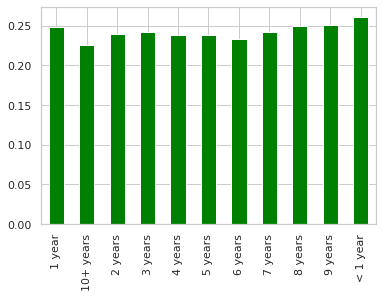

In [20]:
per_charge_off = df[df['loan_repaid'] == 0]['emp_length'].value_counts() / df[df['loan_repaid'] == 1]['emp_length'].value_counts()
per_charge_off.plot.bar(color='green')

Let's drop emp_length:

In [21]:
df = df.drop('emp_length', axis=1)

If we review the title column vs the purpose column looks like there is repeated information

In [22]:
df[['title', 'purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


The title column is simply a string subcategory/description of the purpose column. Let's drop the column.

In [23]:
df = df.drop('title', axis=1)

Now we are going to deal with the missing data of mort_acc. Since mort_acc has a strong correlation with total_acc we will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [24]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
print(total_acc_avg)

Mean of mort_acc column per total_acc
total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64


Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [25]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Let's remove the rows that are missing those values in those columns with dropna().

In [26]:
df = df.dropna()

In [27]:
# check for missing values
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

<a id="ch5"></a>
# 5. Categorical variables and dummy variables
---
We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.

## Term feature
Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().

In [28]:
print(df['term'].value_counts())
print('\n')
print('\n')

df['term'] = df['term'].apply(lambda term: int(term[:3]))

print(df['term'].value_counts())

 36 months    301247
 60 months     93972
Name: term, dtype: int64




36    301247
60     93972
Name: term, dtype: int64


## Grade feature
We already know grade is part of sub_grade, so just drop the grade feature.

In [29]:
df = df.drop('grade', axis=1)

Let's convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.

In [30]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

## Verification_status, application_type, initial_list_status, purpose features
Let's convert these columns into dummy variables and concatenate them with the original dataframe.

In [31]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)

df = pd.concat([df,dummies],axis=1)

## Home_ownership feature
Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.

In [32]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

## Address feature
Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [33]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

## Issue_d feature
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [34]:
df = df.drop('issue_d', axis=1)

## Earliest_cr_line feature
This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'. Then drop the earliest_cr_line feature.

In [35]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line', axis=1)

df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [36]:
df = df.drop('loan_status',axis=1)

<a id="ch6"></a>
# 6. Scaling and train test split
---

In [37]:
# Features
X = df.drop('loan_repaid',axis=1).values

# Label
y = df['loan_repaid'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316175, 78)
(79044, 78)
(316175,)
(79044,)


## Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [39]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


<a id="ch7"></a>
# 7. Creating a model
---
**Dropout Layers**
* Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.
* Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random.
* Helps prevent overfitting.

In [40]:
model = Sequential()

# input layer
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy')

## Early stopping
This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process. Basically, it stop training when a monitored quantity has stopped improving.

In [41]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

<a id="ch8"></a>
# 8. Training the model
---
Now that the model is ready, we can fit the model into the data.

In [42]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          verbose = 2,
          batch_size=256,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/400
1236/1236 - 3s - loss: 0.2972 - val_loss: 0.2642
Epoch 2/400
1236/1236 - 3s - loss: 0.2650 - val_loss: 0.2632
Epoch 3/400
1236/1236 - 4s - loss: 0.2627 - val_loss: 0.2623
Epoch 4/400
1236/1236 - 3s - loss: 0.2616 - val_loss: 0.2615
Epoch 5/400
1236/1236 - 3s - loss: 0.2611 - val_loss: 0.2614
Epoch 6/400
1236/1236 - 3s - loss: 0.2604 - val_loss: 0.2617
Epoch 7/400
1236/1236 - 3s - loss: 0.2597 - val_loss: 0.2615
Epoch 8/400
1236/1236 - 3s - loss: 0.2594 - val_loss: 0.2612
Epoch 9/400
1236/1236 - 3s - loss: 0.2593 - val_loss: 0.2612
Epoch 10/400
1236/1236 - 3s - loss: 0.2590 - val_loss: 0.2614
Epoch 11/400
1236/1236 - 3s - loss: 0.2587 - val_loss: 0.2617
Epoch 12/400
1236/1236 - 3s - loss: 0.2583 - val_loss: 0.2615
Epoch 13/400
1236/1236 - 3s - loss: 0.2583 - val_loss: 0.2617
Epoch 14/400
1236/1236 - 3s - loss: 0.2580 - val_loss: 0.2608
Epoch 15/400
1236/1236 - 3s - loss: 0.2578 - val_loss: 0.2616
Epoch 16/400
1236/1236 - 3s - loss: 0.2576 - val_loss: 0.2610
Epoch 17/400
1236

## Training loss per epoch
* This plot shows the training loss per epoch.
* This plot helps us to see if there is overfitting in the model. In this case there is no overfitting because both lines go down at the same time. 

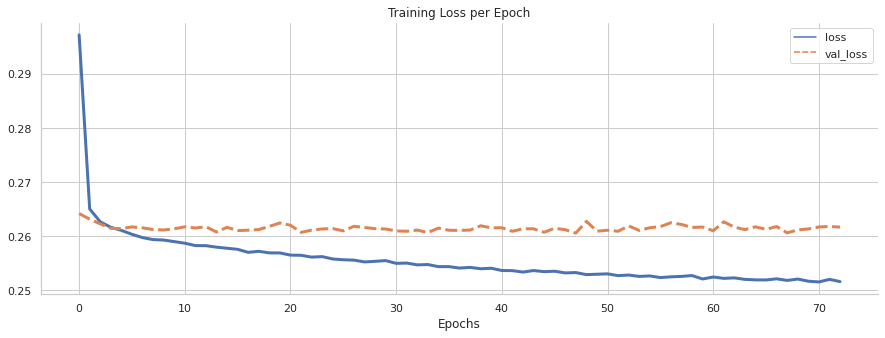

In [43]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

<a id="ch9"></a>
# 9. Evaluation on test data
---
***Classification Report***
* **Accuracy** is just the actual percent that we got right, in this case it was 89%.
* Note that since the data is imbalance if we were to make a model that approve all the loans, it would have a 80% accuracy.
* For example: (317696/len(df)) = 0.80 where 317696 is `df[loan_repaid].value_counts()`
* So do not be fooled by a model that returns back 80% accuracy because by default a model that always reports back to the loan will be repaid itself will be 80% accurate on this actual test data set.


* The **recall** means "how many of this class you find over the whole number of element of this class"
* The **precision** will be "how many are correctly classified among that class"
* The **f1-score** is the harmonic mean between precision & recall
* The **support** is the number of occurence of the given class in your dataset.


* Precision is 0.96, which is really good. On the other hand, recall is not good. 
* We should focus in improving the f1-score in the 0 class. We should improve the 0.62.

***Confusion Matirx***
* A confusion matrix is a technique for summarizing the performance of a classification algorithm.
* Classification accuracy alone can be misleading if you have an unequal number of observations in each class, which is our case. 


* We have 308 Type I errors (False Positive) and 8562 Type II errors (False Negative). 
* 7096 True Positive and 63078 True Negative. 

In [44]:
predictions = model.predict_classes(X_test)

print('Classification Report:')
print(classification_report(y_test, predictions))
print('\n')
print('Confusion Matirx:')
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Confusion Matirx:
[[ 6919  8739]
 [  181 63205]]


<a id="ch10"></a>
# 10. Predicting on a  new customer
---
***Would you offer this person a loan?***

In [45]:
rnd.seed(101)
random_ind = rnd.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [46]:
# we need to reshape this to be in the same shape of the training data that the model was trained on
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

***Did this person actually end up paying back their loan?***

In [47]:
# the prediction was right
df.iloc[random_ind]['loan_repaid']

1.0

<a id="ch11"></a>
# 11. References
* [An Introduction to Statistical Learning with Applications in R](http://faculty.marshall.usc.edu/gareth-james/ISL/) - This book provides an introduction to statistical learning methods.
* [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) - Use Python for Data Science and Machine Learning.

## Feedback
* **Your feedback is much appreciated**
* **<b><font color='green'>Please UPVOTE if you LIKE this notebook</font></b>**
* **Comment if you have any doubts or you found any errors in the notebook**